In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from plotly.offline import plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [87]:
df = pd.read_csv('titanic.csv')
df.head(5)

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes


In [88]:
#sibsp - Number of Siblings/Spouses Aboard, parch - Number of Parents/Children Aboard, ticketno - Ticket Number, fare - Passenger Fare, embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
list(df.columns)

['name',
 'gender',
 'age',
 'class',
 'embarked',
 'country',
 'ticketno',
 'fare',
 'sibsp',
 'parch',
 'survived']

In [89]:
#First let's look at the passenger classes, now we can make sure that the most popular class was 3rd class
class_p = df['class'].value_counts()
fig = go.Figure(data=[go.Pie(labels=class_p.index, values=class_p.values)])
fig.show()

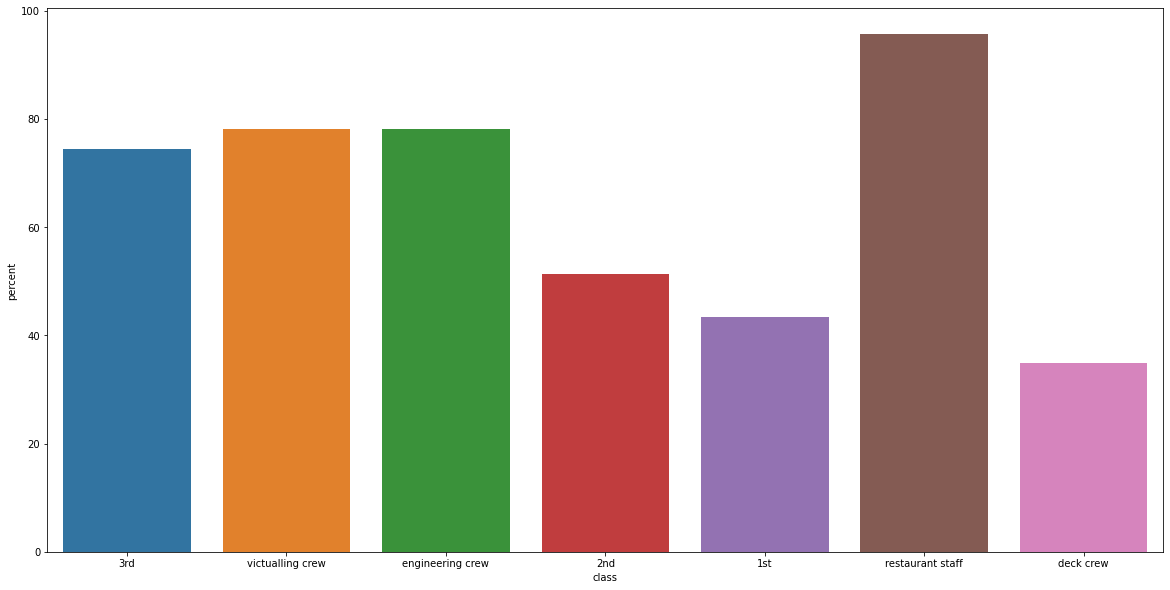

In [90]:
#If we analyze the non-surviving passengers by class, we can see that the biggest loss of people occurred with the restaurant staff(more than 90%)
class_p = df['class'].loc[df['survived']== 'no'].value_counts()
class_all = df['class'].value_counts()
class_stat = pd.DataFrame()
class_stat['number_of_death'] = class_p.values
class_stat['count'] = class_all.values
class_stat['class']  = class_p.index 
class_stat['percent']  = class_stat['number_of_death'] /class_stat['count']*100
plt.figure(figsize = (20,10))
ax = sns.barplot(x='class', y='percent', data=class_stat)
plt.show()

<Figure size 720x2160 with 0 Axes>

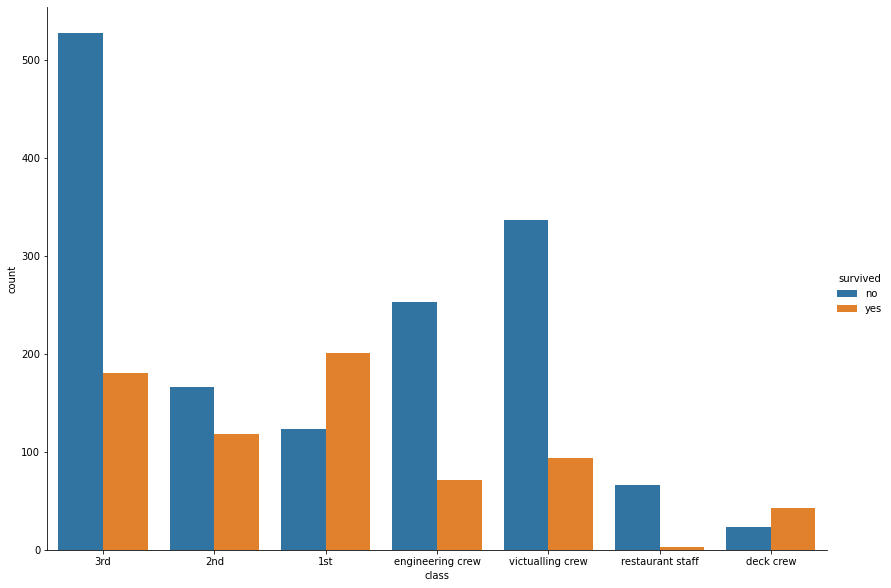

In [91]:
plt.figure(figsize = (10,30))
ax = sns.catplot(kind="count", x="class", hue="survived",data=df,  height=8.27, aspect=11.7/8.27)
plt.show()


In [92]:
#The youngest non-survived passenger was only 0.3 years old
df.sort_values(by=['age']).loc[df['survived']== 'no'].head(1)

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
296,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.333333,3rd,S,Sweden,347080.0,14.08,0.0,2.0,no


In [93]:
#73% of passangers embarked from Southampton
parch_num = df['embarked'].value_counts()
fig = go.Figure(data=[go.Pie(labels=parch_num.index, values=parch_num.values)])
fig.show()

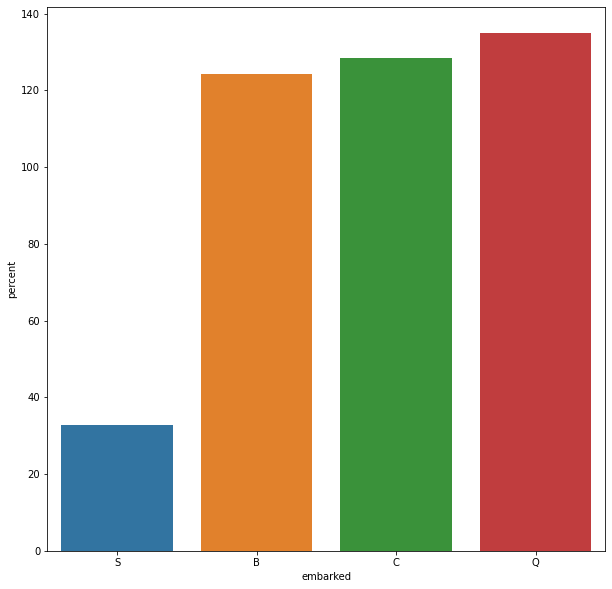

In [94]:
emb_n = df['embarked'].loc[df['survived']== 'no'].value_counts()
emb_all = df['embarked'].value_counts()
emb_stat = pd.DataFrame()
emb_stat['number_of_death'] = emb_n.values
emb_stat['count'] = emb_all.values
emb_stat['embarked']  = emb_n.index 
emb_stat['percent']  = class_stat['number_of_death'] /emb_stat['count']*100
plt.figure(figsize = (10,10))
ax = sns.barplot(x='embarked', y='percent', data=emb_stat )
plt.show()

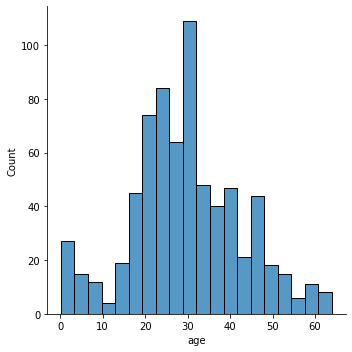

In [95]:
age_stat = sns.displot(x = df['age'].loc[df['survived']== 'yes'], bins = 20)

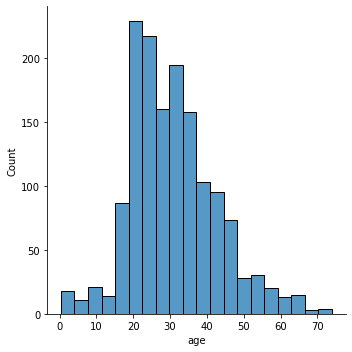

In [96]:
age_stat = sns.displot(x = df['age'].loc[df['survived']== 'no'], bins = 20)

In [97]:
#difference between average ages of survived and not survived passengers
avg_age = pd.DataFrame(df.groupby('survived', as_index=False)['age'].mean())
avg_age

,survived,age
0,no,30.836624
1,yes,29.620370


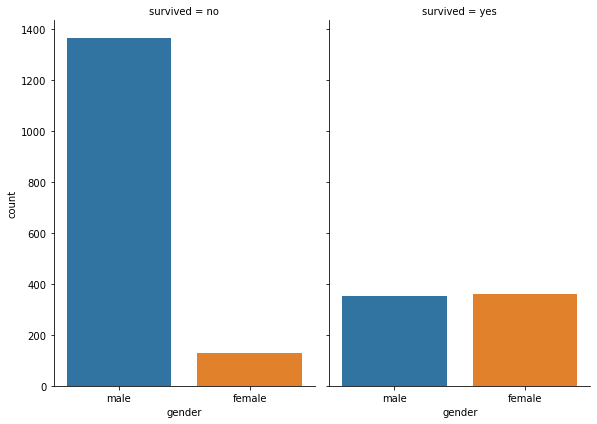

In [98]:
gender_stat = sns.catplot(x="gender",col="survived", data=df, kind="count",height=6, aspect=.7);


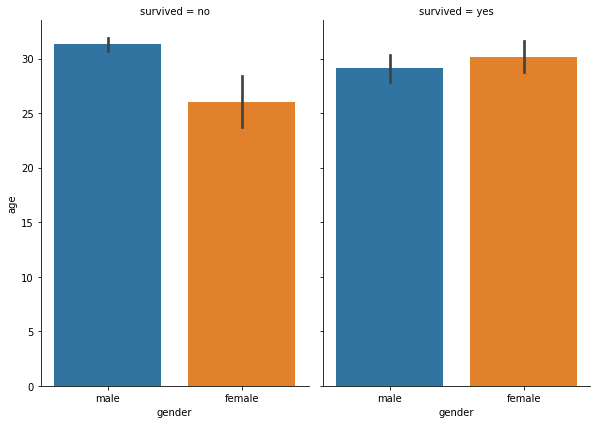

In [99]:
gender_stat2 = sns.catplot(x="gender", y = "age",col="survived", data=df, kind="bar",height=6, aspect=.7);


In [100]:
#most popular countries in our data
pop_countries = df['country'].value_counts()
pop_countries.head(5)

England          1125
United States     264
Ireland           137
Sweden            105
Lebanon            71
Name: country, dtype: int64

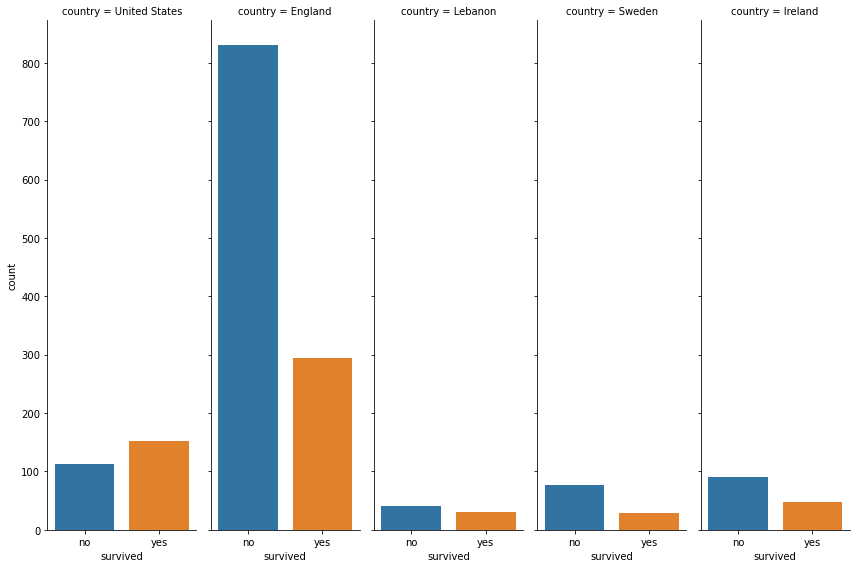

In [101]:
country_stat = sns.catplot(x="survived", col="country", 
                data=df[df['country'].isin(pop_countries.head(5).index)],
                kind="count", height=8, aspect=.3)


In [102]:
# 549 passenger out of 788 non-surviving passengers were alone
len(df.loc[(df['parch']== 0.0) & (df['sibsp'] == 0.0) & (df['survived'] == "no")])


549

# After all these analyses, we were able to determine which factors influenced the passenger to survive or not to survive.
We found that most of the passengers who did not survive were alone. We also made sure that mostly the
passengers of the restaurant staff and those who were from England could not survive